## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, how="left", on = "Mouse ID")
# Display the data table for preview
complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(complete_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_df.loc[complete_df.duplicated(), ["Mouse ID","Timepoint"]]

,Mouse ID,Timepoint
909,g989,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_df.loc[complete_df.duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_df.drop_duplicates()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(complete_df["Mouse ID"].unique())

249

## Summary Statistics

* Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



In [17]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# group the complete table by different drug regimen
grouped_df = complete_df.groupby("Drug Regimen")
# calculate mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = grouped_df["Tumor Volume (mm3)"].mean()
medians = grouped_df["Tumor Volume (mm3)"].median()
variances = grouped_df["Tumor Volume (mm3)"].var()
sds = grouped_df["Tumor Volume (mm3)"].std()
sems = grouped_df["Tumor Volume (mm3)"].sem()
# put them into one dataframe and name each column
summary_df = pd.DataFrame({
    "Mean":means, 
    "Median":medians, 
    "Variance":variances,
    "Standard Deviation":sds,
    "SEM":sems
})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


* Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [21]:
# This method produces everything in a single groupby function
# use the groupedby dataframe and get describtive statistic
summary_df2 = grouped_df['Tumor Volume (mm3)'].describe()
summary_df2

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

* Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


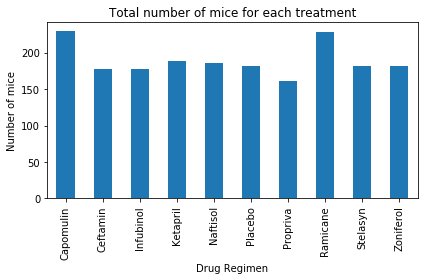

In [57]:
# count number of mice for each drug regimen
mice_count = grouped_df["Mouse ID"].count()
# plot a bar plot with pandas
mice_count.plot(kind = "bar")
# set title and labels
plt.title("Total number of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
# save graph 
plt.tight_layout()
plt.savefig("Images/mice_per_treatment_pandas.png")
# print plot
plt.show()

* Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

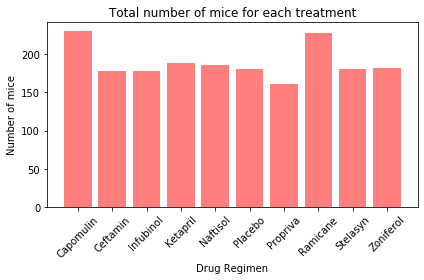

In [66]:
# calculate mice count under each treatment and set the length of x axis
mice_counts2 = grouped_df["Mouse ID"].count()
x_axis = np.arange(len(mice_counts2))
# tell matplotlib we are going to make a bar chart
plt.bar(x_axis, mice_counts2, color = "red", alpha = 0.5, align = "center")
# place headers for each of the x axis
tick_locations = [value for value in x_axis]
headers = grouped_df.groups.keys()
plt.xticks(tick_locations, headers, rotation=45)
# set title and labels
plt.title("Total number of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
# save graph 
plt.tight_layout()
plt.savefig("Images/mice_per_treatment_pyplot.png")
# print plot
plt.show()

* Generate a pie plot showing the distribution of female versus male mice using pandas

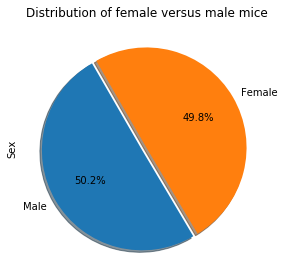

In [83]:
# count number of mice under each sex
sex_count = mouse_metadata["Sex"].value_counts()
# use pandas to plot a pie chart
explode = (0.05, 0)
sex_count.plot(kind="pie", explode=explode, autopct="%1.1f%%", shadow=True, startangle=120)
# set title and labels
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
# save graph 
plt.tight_layout()
plt.savefig("Images/mice_by_sex_pandas.png")
# print plot
plt.show()

* Generate a pie plot showing the distribution of female versus male mice using pyplot

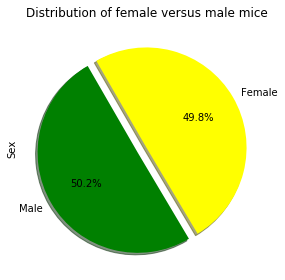

In [84]:
# count number of mice under each sex
sex_count = mouse_metadata["Sex"].value_counts()
# set each features for a pie chart
labels = sex_count.index.values
values = sex_count.values
colors = ["green","yellow"]
explode = (0.1, 0)
# plot a pie chart
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
# set title and labels
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
# save graph 
plt.tight_layout()
plt.savefig("Images/mice_by_sex_pyplot.png")
# print plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
